In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from collections import defaultdict


In [123]:
df = pd.read_csv(rf'C:\Users\breno\OneDrive\Attachments\Documentos\GitHub\stnl-dataminer-api\studycase\productivity\data\jira.csv')

In [124]:
df.head()

,issue_id,issue_key,project,priority,status,assignee,creator,created,updated,issuetype,issuetype_description,summary,description,all_fields,commits,time_mined,comments,activity_log,checklist,history
0,10401,CSTONE-269,CSTONE,Medium,Concluído,Diogo Marassi,Diogo Marassi,2024-08-14 22:00:11.343+00,2024-08-22 18:57:59.582+00,Subtarefa,Uma pequena parte do trabalho que faz parte de...,Criar visualização dos novos dados fornecidos ...,"Tarefa consiste em analisar, tentar entender e...","{""Rank"": ""0|i001mf:"", ""Team"": null, ""votes"": {...",[],2025-04-23 19:08:13.625998+00,[],"[{""to"": ""Done"", ""from"": ""Nenhuma"", ""type"": ""re...",[],"[{""id"": ""14052"", ""items"": [{""to"": ""10000"", ""fr..."
1,10398,CSTONE-266,CSTONE,Highest,Concluído,Lucas Lopes,Lucas Lopes,2024-08-14 19:24:20.415+00,2024-09-04 12:14:54.985+00,Subtarefa,Uma pequena parte do trabalho que faz parte de...,Estudar Django e iniciar criação da API,Estudar e explorar Django para fazer a API,"{""Rank"": ""0|i001mx:"", ""Team"": null, ""votes"": {...",[],2025-04-23 19:08:17.548463+00,"[{""id"": ""10571"", ""body"": "" Já criei um rep...","[{""to"": ""Done"", ""from"": ""Nenhuma"", ""type"": ""re...",[],"[{""id"": ""14365"", ""items"": [{""to"": """", ""from"": ..."
2,10397,CSTONE-265,CSTONE,Medium,Concluído,Lucas Lopes,Lucas Lopes,2024-08-14 18:13:11.425+00,2024-08-14 18:14:54.376+00,Subtarefa,Uma pequena parte do trabalho que faz parte de...,Ler e apresentar material sobre o artigo: GHTo...,"A tarefa consiste em ler, elaborar e apresenta...","{""Rank"": ""0|i001lr:"", ""Team"": null, ""votes"": {...",[],2025-04-23 19:08:19.77397+00,[],"[{""to"": ""Done"", ""from"": ""Nenhuma"", ""type"": ""re...",[],"[{""id"": ""13899"", ""items"": [{""to"": ""10000"", ""fr..."
3,11167,CSTONE-534,CSTONE,Medium,Tarefas pendentes,Arthur Alesi,Arthur Alesi,2025-03-31 19:51:59.858+00,2025-04-05 16:03:33.643+00,Subtarefa,Uma pequena parte do trabalho que faz parte de...,Implementar página de dashboard,Criar esqueleto da página de Dashboard definir...,"{""Rank"": ""0|i002r7:"", ""Team"": null, ""votes"": {...",[],2025-04-23 18:58:59.288341+00,"[{""id"": ""11302"", ""body"": "" favor atualizar a a...",[],[],"[{""id"": ""17456"", ""items"": [{""to"": ""11037"", ""fr..."
4,11135,CSTONE-533,CSTONE,Highest,Em análise,Breno Neves,Breno Neves,2025-03-28 14:50:59.103+00,2025-03-28 14:52:07.602+00,Subtarefa,Uma pequena parte do trabalho que faz parte de...,Disponibilizar dados minerados via API para es...,"A tarefa consiste em disponibilizar, por meio ...","{""Rank"": ""0|i002qz:"", ""Team"": null, ""votes"": {...",[],2025-04-23 18:59:01.930032+00,[],"[{""to"": ""IN REVIEW"", ""from"": ""To Do"", ""type"": ...",[],"[{""id"": ""17435"", ""items"": [{""to"": ""10020"", ""fr..."


In [125]:
def parse_json_column(column):
    return column.apply(lambda x: json.loads(x) if isinstance(x, str) and x.startswith("[") else [])

df['comments_parsed'] = parse_json_column(df['comments'])
df['activity_log_parsed'] = parse_json_column(df['activity_log'])
df['commits_parsed'] = parse_json_column(df['commits'])

In [126]:
def prepare_dates(dataframe):
    dataframe['created_dt'] = pd.to_datetime(dataframe['created'])
    dataframe['updated_dt'] = pd.to_datetime(dataframe['updated'])
    return dataframe

df = prepare_dates(df)

In [127]:
def plot_weekly_comments(dataframe):
    dataframe['week'] = dataframe['created_dt'].dt.to_period('W').apply(lambda r: r.start_time)
    comment_counts = dataframe.groupby('week')['comments_parsed'].apply(lambda x: sum(len(c) for c in x))
    
    plt.figure(figsize=(12, 6))
    plt.plot(comment_counts.index, comment_counts.values, marker='o', linewidth=2)
    plt.title('Weekly Comment Activity')
    plt.xlabel('Week')
    plt.ylabel('Number of Comments')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [128]:
def plot_weekly_transitions(dataframe):
    dataframe['week'] = dataframe['created_dt'].dt.to_period('W').apply(lambda r: r.start_time)
    transition_counts = dataframe.groupby('week')['activity_log_parsed'].apply(lambda x: sum(len(a) for a in x))

    plt.figure(figsize=(12, 6))
    plt.plot(transition_counts.index, transition_counts.values, marker='s', linewidth=2, color='orange')
    plt.title('Weekly Status Transitions')
    plt.xlabel('Week')
    plt.ylabel('Number of Transitions')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [129]:
def plot_weekly_commits(dataframe):
    dataframe['week'] = dataframe['created_dt'].dt.to_period('W').apply(lambda r: r.start_time)
    commit_counts = dataframe.groupby('week')['commits_parsed'].apply(lambda x: sum(len(c) for c in x))

    plt.figure(figsize=(12, 6))
    plt.plot(commit_counts.index, commit_counts.values, marker='^', linewidth=2, color='green')
    plt.title('Weekly Commits Linked to Issues')
    plt.xlabel('Week')
    plt.ylabel('Number of Commits')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [130]:
def plot_weekly_resolution_time(dataframe):
    dataframe['resolution_days'] = (dataframe['updated_dt'] - dataframe['created_dt']).dt.total_seconds() / (60 * 60 * 24)
    dataframe['week'] = dataframe['created_dt'].dt.to_period('W').apply(lambda r: r.start_time)
    resolution_by_week = dataframe.groupby('week')['resolution_days'].mean()

    plt.figure(figsize=(12, 6))
    plt.plot(resolution_by_week.index, resolution_by_week.values, marker='D', linewidth=2, color='purple')
    plt.title('Average Resolution Time per Week (days)')
    plt.xlabel('Week')
    plt.ylabel('Resolution Time (days)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [131]:
def plot_weekly_status_distribution(dataframe):
    dataframe['week'] = dataframe['created_dt'].dt.to_period('W').apply(lambda r: r.start_time)
    weekly_status = dataframe.groupby(['week', 'status']).size().unstack(fill_value=0)

    weekly_status.plot(
        kind='bar',
        stacked=True,
        figsize=(14, 7),
        colormap='tab10'
    )
    plt.title('Weekly Issue Status Distribution')
    plt.xlabel('Week')
    plt.ylabel('Number of Issues')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\breno\AppData\Local\Temp\ipykernel_31012\851569341.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dataframe['week'] = dataframe['created_dt'].dt.to_period('W').apply(lambda r: r.start_time)


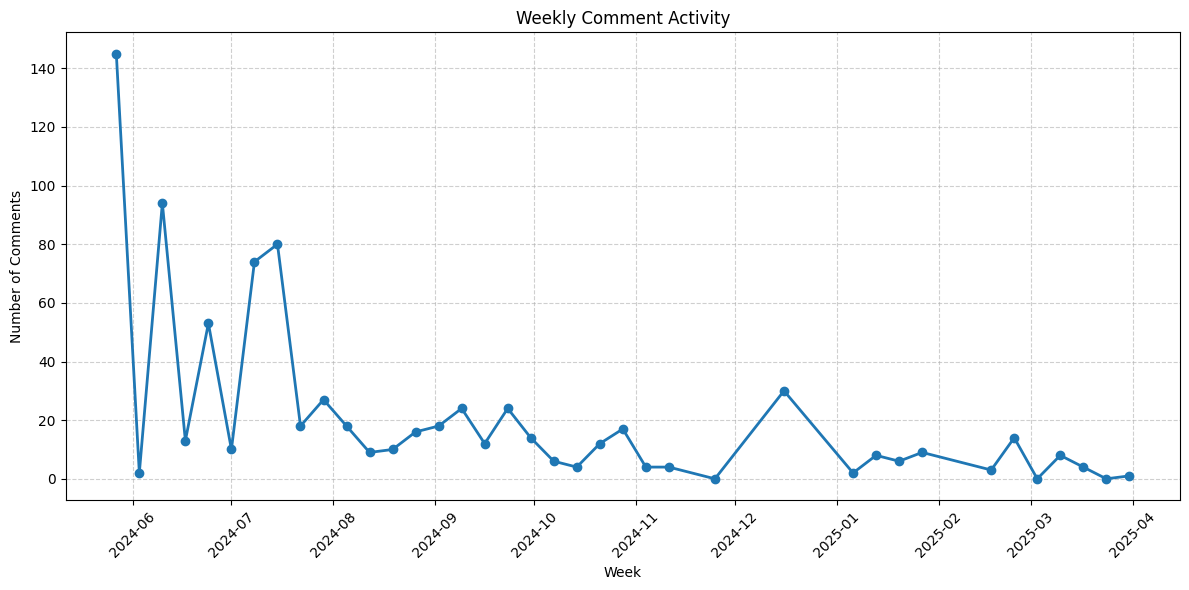

In [132]:
plot_weekly_comments(df)

C:\Users\breno\AppData\Local\Temp\ipykernel_31012\1197786059.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dataframe['week'] = dataframe['created_dt'].dt.to_period('W').apply(lambda r: r.start_time)


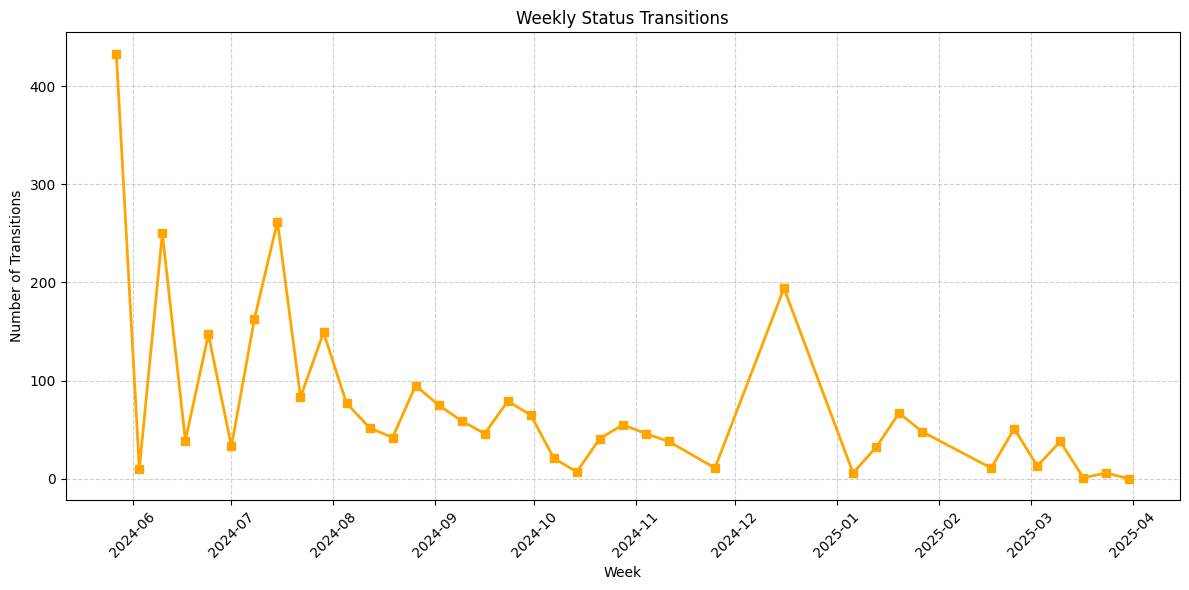

In [133]:
plot_weekly_transitions(df)

C:\Users\breno\AppData\Local\Temp\ipykernel_31012\25917682.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dataframe['week'] = dataframe['created_dt'].dt.to_period('W').apply(lambda r: r.start_time)


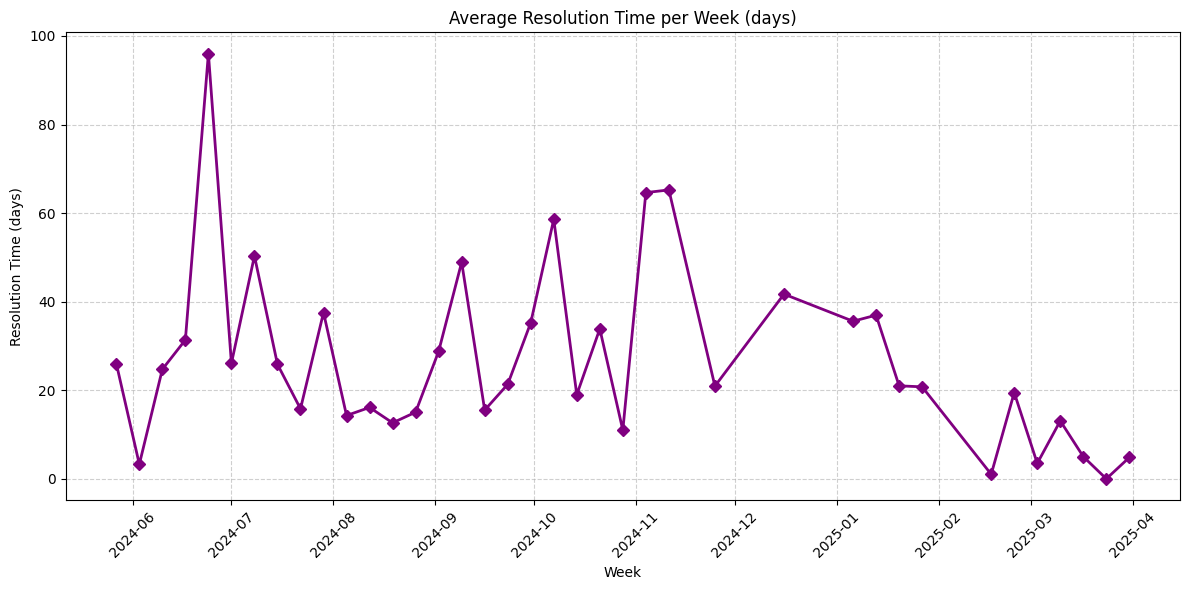

In [134]:
plot_weekly_resolution_time(df)


C:\Users\breno\AppData\Local\Temp\ipykernel_31012\702574033.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dataframe['week'] = dataframe['created_dt'].dt.to_period('W').apply(lambda r: r.start_time)


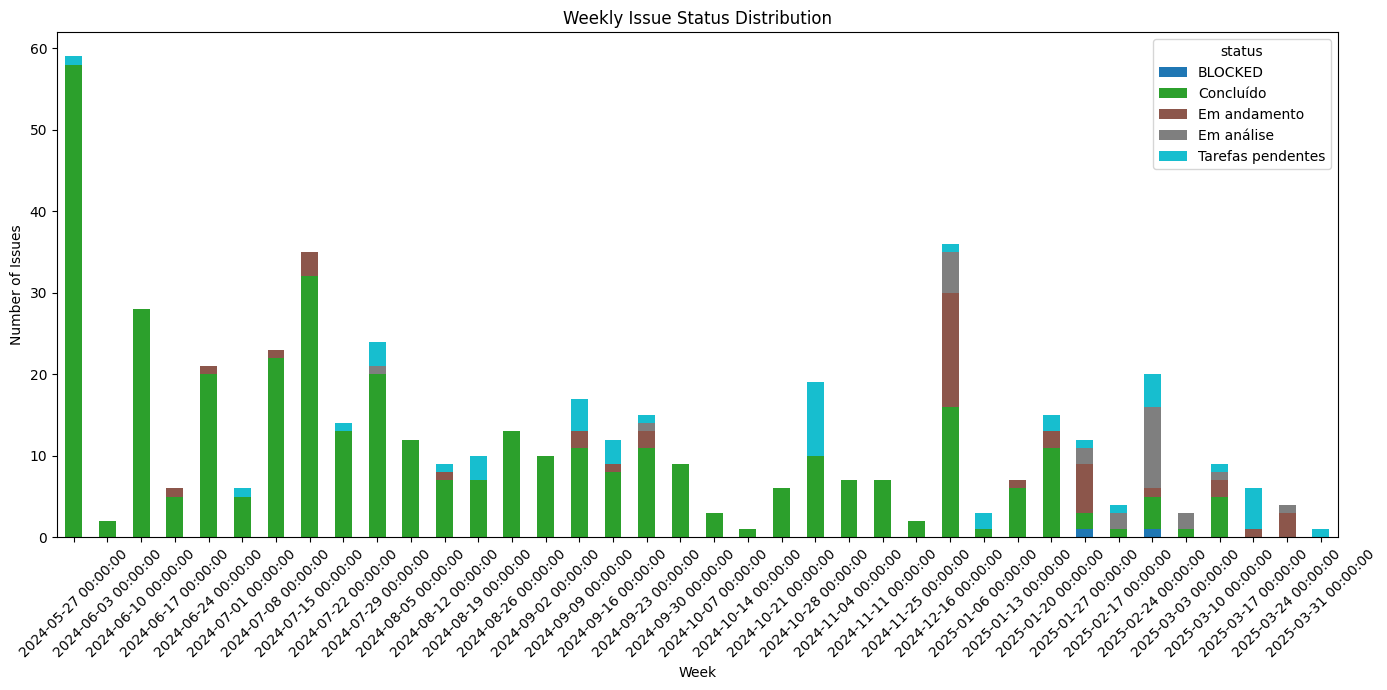

In [135]:
plot_weekly_status_distribution(df)


In [136]:
def plot_change_density(dataframe):
    activity_counts = dataframe['activity_log_parsed'].apply(len)
    history_parsed = parse_json_column(dataframe['history'])
    history_counts = history_parsed.apply(len)
    total_changes = activity_counts + history_counts

    plt.figure(figsize=(12, 6))
    total_changes.plot(kind='hist', bins=20, color='steelblue', edgecolor='black')
    plt.title('Change Density per Issue (Activity + History)')
    plt.xlabel('Number of Changes')
    plt.ylabel('Number of Issues')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [161]:
def extract_status_durations(activity_logs, created_date):
    durations = defaultdict(float)
    last_time = pd.to_datetime(created_date)
    for entry in activity_logs:
        if isinstance(entry, dict) and 'from' in entry and 'created' in entry:
            try:
                new_time = pd.to_datetime(entry['created'])
                status = entry['from']
                durations[status] += (new_time - last_time).total_seconds() / 3600  # horas
                last_time = new_time
            except Exception:
                continue
    return durations


def plot_avg_time_per_status(dataframe):
    from collections import defaultdict
    logs = dataframe['activity_log_parsed']
    created_dates = dataframe['created_dt']
    status_time_totals = defaultdict(float)
    status_counts = defaultdict(int)

    for log, created in zip(logs, created_dates):
        durations = extract_status_durations(log, created)
        for status, time in durations.items():
            if time > 0:
                status_time_totals[status] += time
                status_counts[status] += 1

    avg_time = {k: status_time_totals[k] / status_counts[k] for k in status_time_totals if status_counts[k] > 0}
    
    if not avg_time:
        print("Nenhum status com duração válida encontrado.")
        return

    avg_time_series = pd.Series(avg_time).sort_values()

    plt.figure(figsize=(10, 6))
    avg_time_series.plot(kind='barh', color='slateblue')
    plt.title('Average Time Spent per Status (in Hours)')
    plt.xlabel('Average Duration (hours)')
    plt.ylabel('Status')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [162]:
def plot_comment_resolution_correlation(dataframe):
    dataframe['comment_count'] = dataframe['comments_parsed'].apply(len)
    dataframe['resolution_days'] = (dataframe['updated_dt'] - dataframe['created_dt']).dt.total_seconds() / (60 * 60 * 24)

    plt.figure(figsize=(8, 6))
    plt.scatter(dataframe['comment_count'], dataframe['resolution_days'], alpha=0.6, color='teal')
    plt.title('Comments vs. Resolution Time')
    plt.xlabel('Number of Comments')
    plt.ylabel('Resolution Time (days)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [163]:
def count_reopenings(log):
    visited = []
    count = 0
    for entry in log:
        to_status = entry.get('to', '')
        if to_status in visited:
            count += 1
        visited.append(to_status)
    return count

def plot_reopenings(dataframe):
    dataframe['reopens'] = dataframe['activity_log_parsed'].apply(count_reopenings)
    plt.figure(figsize=(10, 5))
    dataframe['reopens'].value_counts().sort_index().plot(kind='bar', color='tomato')
    plt.title('Task Reopenings (Returning to Previous Status)')
    plt.xlabel('Number of Reopens')
    plt.ylabel('Number of Issues')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [164]:
def plot_update_gaps(dataframe):
    dataframe['update_gap'] = (dataframe['updated_dt'] - dataframe['created_dt']).dt.total_seconds() / (60 * 60 * 24)
    plt.figure(figsize=(10, 5))
    dataframe['update_gap'].plot(kind='hist', bins=20, color='darkorange', edgecolor='black')
    plt.title('Update Gaps: Created vs. Last Update')
    plt.xlabel('Gap Duration (days)')
    plt.ylabel('Number of Issues')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [193]:
def plot_created_vs_concluded(dataframe):
    import matplotlib.dates as mdates
    
    dataframe['week'] = dataframe['created_dt'].dt.to_period('W').apply(lambda r: r.start_time)
    created_counts = dataframe.groupby('week').size()

    concluded = dataframe[dataframe['status'] == 'Concluído']
    concluded['week'] = concluded['updated_dt'].dt.to_period('W').apply(lambda r: r.start_time)
    concluded_counts = concluded.groupby('week').size()

    # Aumentando ainda mais o tamanho da figura
    plt.figure(figsize=(15, 8))
    
    # Linha contínua para Created
    plt.plot(created_counts.index, created_counts.values, label='Created', 
             linewidth=3, marker='o', linestyle='-', markersize=8)
    
    # Linha pontilhada para Concluded
    plt.plot(concluded_counts.index, concluded_counts.values, label='Concluded', 
             linewidth=3, marker='s', linestyle='--', markersize=8)
    
    # Aumentando tamanho das labels dos eixos
    plt.xlabel('Month', fontsize=16, labelpad=10)
    plt.ylabel('Number of Tasks', fontsize=16, labelpad=10)
    
    # Aumentando tamanho dos números nos eixos
    plt.tick_params(axis='both', which='major', labelsize=14)
    
    # Legenda com fonte maior
    plt.legend(fontsize=14)
    
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Formatando as datas no eixo x para mostrar apenas mês
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
    plt.xticks(rotation=45)
    
    # Aumentando o zoom ao máximo
    plt.margins(x=0.01, y=0.1)
    
    # Ajustando o layout para evitar cortes
    plt.tight_layout()
    plt.show()

In [200]:
def plot_comments_vs_reopens(dataframe):
    # Garantir colunas auxiliares
    dataframe['comments_parsed'] = parse_json_column(dataframe['comments'])
    dataframe['activity_log_parsed'] = parse_json_column(dataframe['activity_log'])

    # Calcular métricas
    dataframe['comment_count'] = dataframe['comments_parsed'].apply(len)
    dataframe['reopen_count'] = dataframe['activity_log_parsed'].apply(count_reopenings)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(dataframe['comment_count'], dataframe['reopen_count'], alpha=0.7, color='mediumseagreen')
    plt.title('Comments vs. Reopen Count per Task')
    plt.xlabel('Number of Comments')
    plt.ylabel('Number of Reopens')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

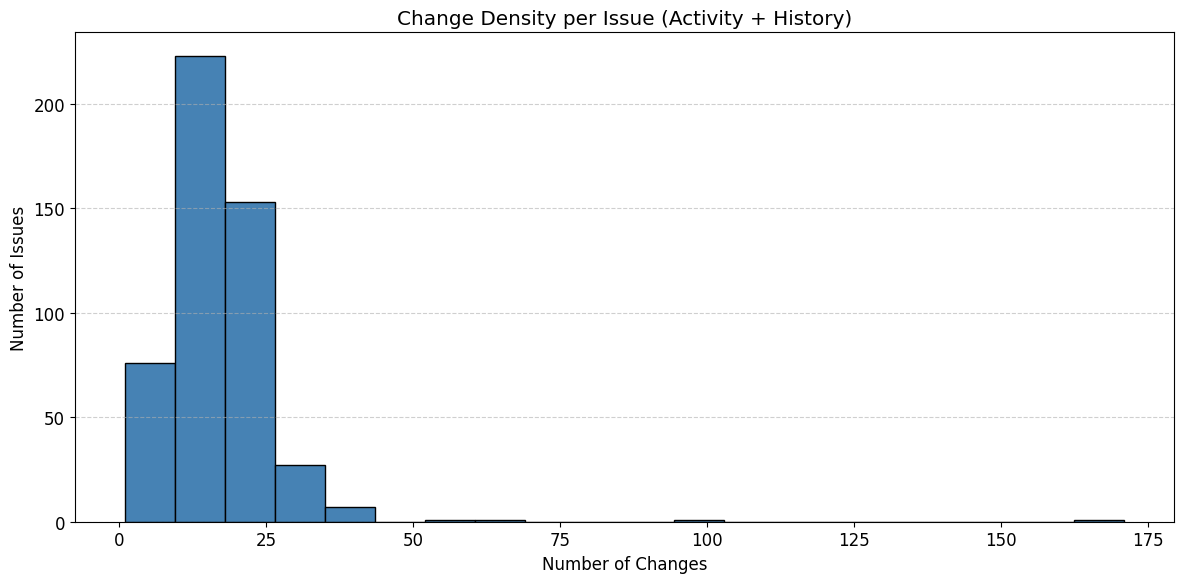

In [194]:
plot_change_density(df)


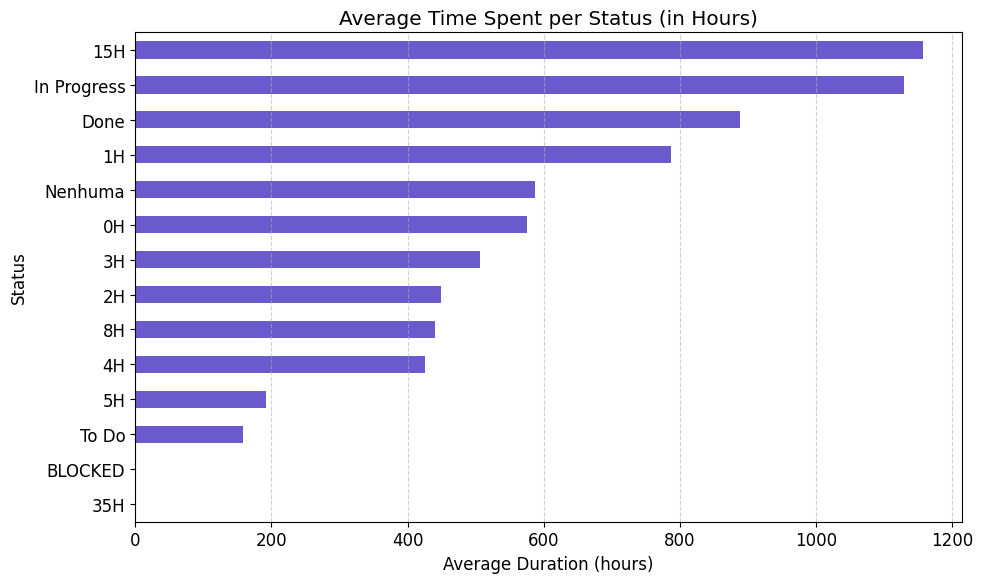

In [195]:
plot_avg_time_per_status(df)


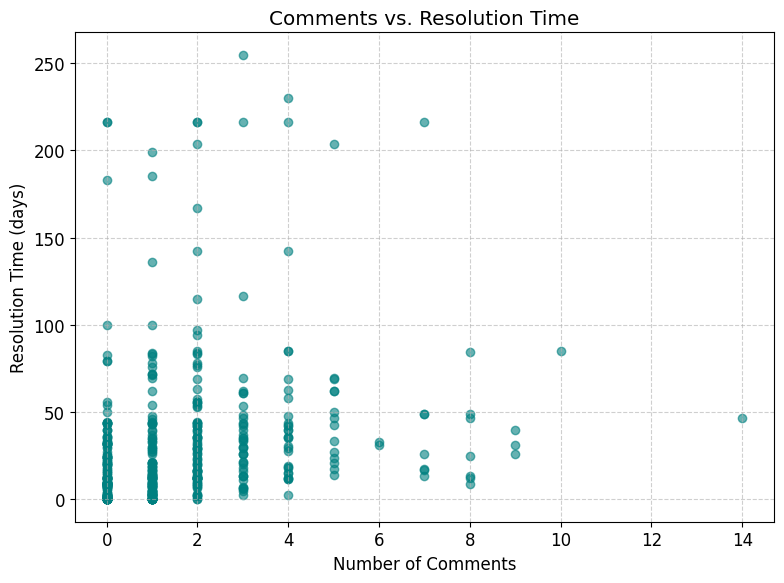

In [196]:
plot_comment_resolution_correlation(df)


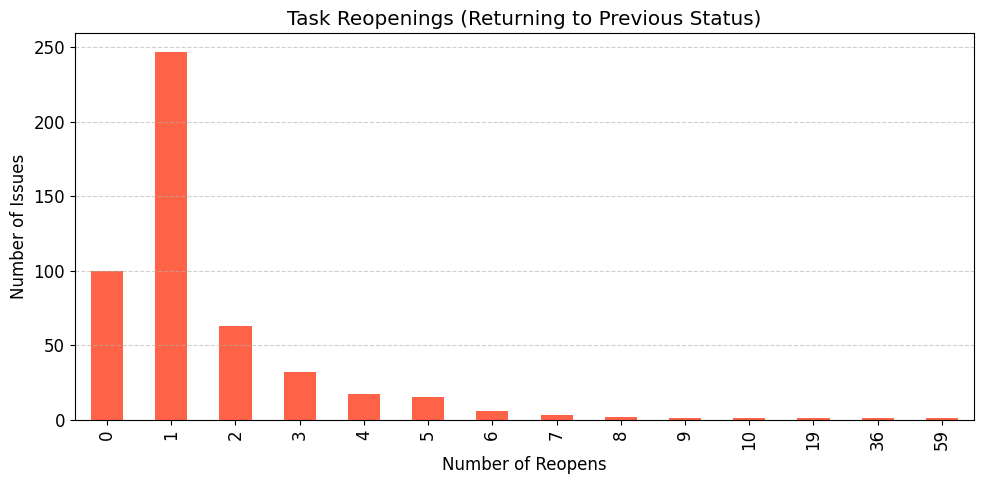

In [197]:
plot_reopenings(df)


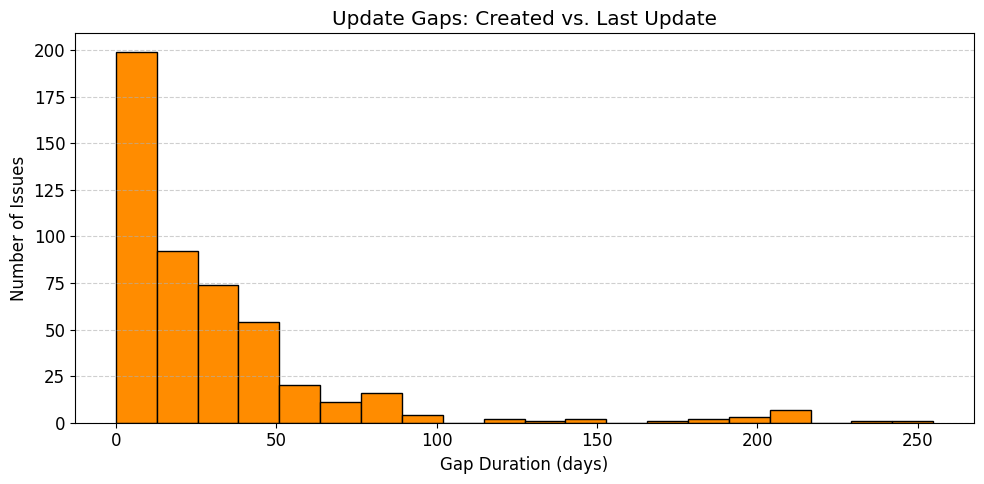

In [198]:
plot_update_gaps(df)


C:\Users\breno\AppData\Local\Temp\ipykernel_31012\1380652183.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dataframe['week'] = dataframe['created_dt'].dt.to_period('W').apply(lambda r: r.start_time)
C:\Users\breno\AppData\Local\Temp\ipykernel_31012\1380652183.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  concluded['week'] = concluded['updated_dt'].dt.to_period('W').apply(lambda r: r.start_time)
C:\Users\breno\AppData\Local\Temp\ipykernel_31012\1380652183.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concluded['week'] = concluded['updated_dt'].dt.to_period('W').apply(lambda r: r.start_time)


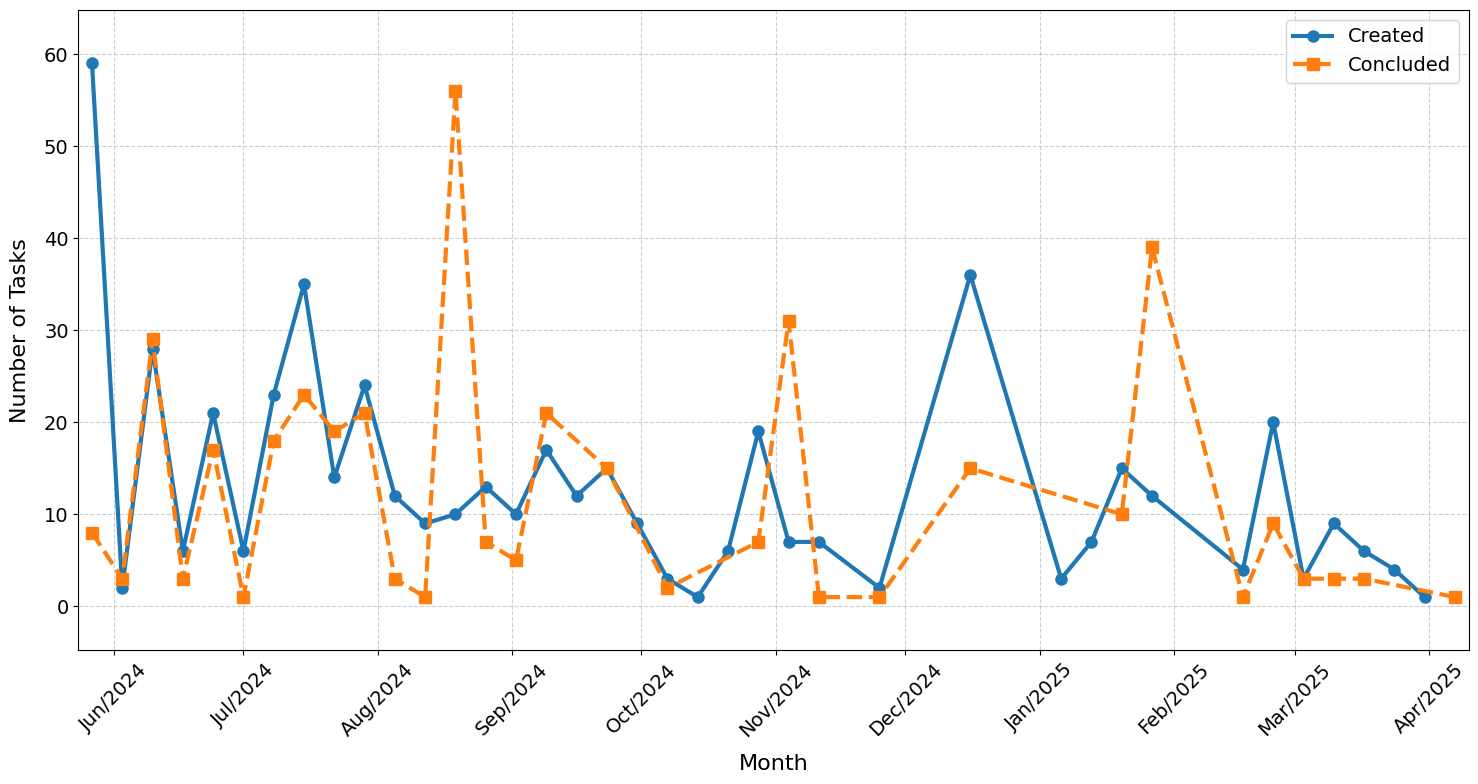

In [199]:
plot_created_vs_concluded(df)


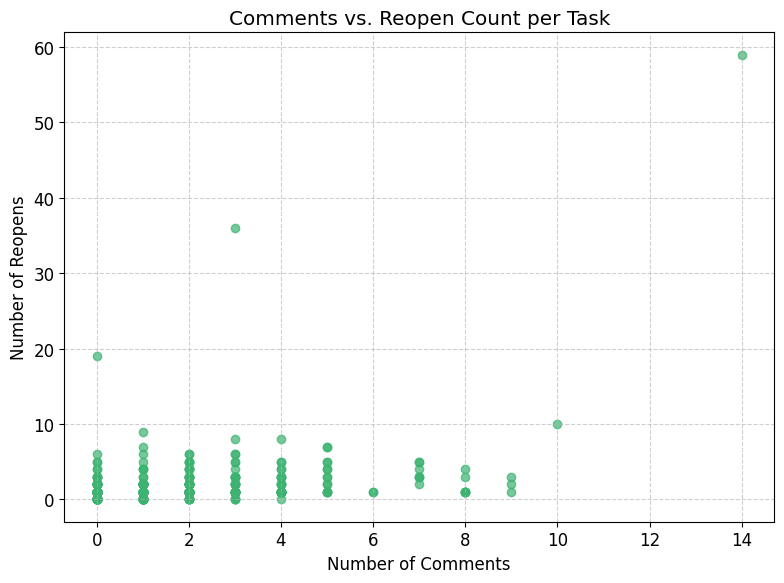

In [201]:
plot_comments_vs_reopens(df)
